# ADAMS Tutorial #4: Neural Networking (NN) Primer
## Part 3 of 3

This is the third of three notebooks which will cover our initial steps into creating our own neural network. The parts are as follows:

This is the final of three notebooks which will cover the foundations of neural networks. Please review the first two notebooks if you haven't yet, as this notebook assumes you understand the first two. In the first notebook, we discussed how the algorithm can be initialized randomly. The second notebook focused on training the network through back propagation. Training is the process in which we update the weights to maximize the fit of our network to (the training) data. Network training is, therefore, equivalent to maximum likelihood estimation in regression analysis. 

This notebook will be exploring a different problem that neural networks are well-suited to fix: classification. We will be rewiring the same code form part 2, only this time, our network will classify samples. Differences will be explained as we go.

- Neural Network Structures and the Forward Pass
- Coding a Back Propagation
- Changes for Classification

## This notebook's topic: Adapting what we know for a classification network ##
 1. Reviewing classification problems
 2. Highlighting differences in the algorithm
 3. Revising our code to solve a classification problem
 4. A cheat sheet for the most basic neural network problems

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
range_for_demo = np.linspace(-5, 5, 100)

import random
random.seed(888)  # set seed for reproducibility
np.random.seed(888)

from sklearn.datasets import make_blobs
from matplotlib import pyplot
import pandas as pd
import numpy as np

# Types of classification problems

There are a few types of problems which require us to label the classes of data. Here is a quick summary:

**Binary Classification** tries to predict which of two options is most likely. Eg. Will this customer spend money today (yes/no)? Will rain fall today (yes/no)?
 - Single dummy: binary target coded as a single binary variable representing the probability of an event occurring or label 1 (eg. one variable for purchase, no purchase is inferred as the inverse)
 - Two-dummy: one dummy is the probability of the non-event/label 0, the second being the probability of the event/label 1 (eg. one variable for no purchase and one variable for purchase)

In [2]:
# single dummy approach
Y = [1, 0, 1]

# two-dummy approach (same information as the single dummy above)
Y_0 = [0, 1, 0]
Y_1 = [1, 0, 1]  # note that this vector is identical to single dummy

**Single Label Multi-Class Problems** tries to predict which of 3 or more options are most likely but only ONE class is possible. Eg. Is this image a cat, dog or bird? It is recommended to code this as a dummy variable.

**Multiple Label Multi-Class Problems** tries to predict which of 3 or more options are most likely and when multiple classes are possible. Eg. Which of these products will be purchased? It is recommended to code this as a dummy variable.

# Differences in NNs for binary classification

## Toy Data Generation: Binary Classification

In [3]:
n = 100000
k = 2

XX, Y = make_blobs(n_samples=n, n_features=k, centers=2, random_state=888, cluster_std=1.5)

Y = Y.reshape(n,1)

## Network architecture
For the most part, the network architecture required for binary classification networks is very similar to those required for regression networks. However, we do have to be careful about specifying the output layer.

### Output layer size
For regression problems, we had a constant output layer size of 1 neuron because we were only predicting one number.

For **binary classification** problems where the target is coded as a single dummy variable, you will need 1 node in your output layer. If there are two dummy variables for the target (one dummy for class 0 and one dummy for class 1), you will need 2 nodes.

In [4]:
# Network architecture:
inputLayer_size = 2      # number of features in X, in this case we only have 2
hiddenLayer_size = 10    # number of hidden layer nodes
outputLayer_size = 1     # number of values to predict, in this case, our target is a scalar

As before, for the initialization, we will only take the 5th observation in the dataset.

In [5]:
# This will not work since, for matrix multiplication, we need a kx1 vector
X = np.array(XX[5]).reshape((inputLayer_size, 1))
X.shape  # This should be kx1

(2, 1)

In [6]:
y = Y[5].reshape((outputLayer_size, 1))
y.shape  # since our data is a single value regression for a single observation, we should see (1, 1) here

(1, 1)

## Weight initialization
For the most part, weight initialization is pretty much identical for classification problems. Just be careful of your output layer size if you have more than one target column (multiple classes or two-dummy encoded binary classification).

In [7]:
limit = np.sqrt(6 / (inputLayer_size + outputLayer_size))  # Recommended weight initialization

# Random weight and bias initialization
W_0 = np.random.uniform(-limit, limit, (hiddenLayer_size, inputLayer_size))    # input to hidden layer weights
W_1 = np.random.uniform(-limit, limit, (outputLayer_size, hiddenLayer_size))  # hidden to output layer weights

B_0 = np.ones((hiddenLayer_size,1))  # input to hiden layer biases
B_1 = np.ones((outputLayer_size,1))  # hidden to output layer biases

In [8]:
Z_hidden = np.dot(W_0, X) + B_0
Z_hidden[:5]  # these are the first five nodes' input values

array([[-10.39293216],
       [ 12.66778464],
       [-10.72624367],
       [  2.7568921 ],
       [  4.14130474]])

## Activation functions

Remember that you should distinguish your activation functions in two groups:
- Hidden layer activations: here you can experiment with any previously explained activation function
- Final layer activation: this one needs to suit your output. We mentioned using a ReLU for regression. Below we will discuss classification activations.

For the hidden layer in our current network, let's take $tanh$ this time.

In [9]:
# Activation function that we will use in this scenario and its derivative
def tanH(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))


def tanH_derivative(x):
    return 1-tanH(x)**2

In [10]:
H = tanH(Z_hidden)
H[:5]  # these are the first five nodes' output values (after activation)

array([[-1.        ],
       [ 1.        ],
       [-1.        ],
       [ 0.99197071],
       [ 0.99949437]])

### Final activation function

We talked about a few possible activation functions such as ReLU, leaky ReLU, tanh and sigmoid. We can experiment with any of these if they are not in the final layer. However, we need to pay attention to the final layer's activation because it determines the range of values that will be output. 

#### Sigmoid and binary classification
**If your target is a single dummy**, you will need your network to output a value between 0 and 1 as the probability of class 1. The best final activation function for the output layer will be **sigmoid** whose outputs are always squeezed into a probability between 0 and 1. tanh can also be used but note that it ranges between -1 and 1, so you will need to rescale it. If you would like to see a more detailed breakdown of the sigmoid function, you can find it in the section on activation functions in part 2 of this series of tutorials.

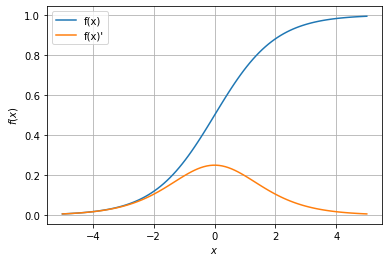

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1-s)

plt.plot(range_for_demo, sigmoid(range_for_demo), label='f(x)')
plt.plot(range_for_demo, sigmoid_derivative(range_for_demo), label="f(x)'")
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
plt.show()

#### Softmax and binary classification

**If your target is two dummy variables**, you'll have 2 output neurons. The first neuron outputs the probability of class 0 and the second outputs the probability of class 1. We want the sum of the probability of both classes to be 1. In this case, we have a final activation function called **softmax** which will make sure the output squeeze all probabilities sum to 1.

$$ \text{softmax}(x) = \frac{e^{x_i}}{\sum_{j=1} e^{x_j} } $$

#### What about more classes?
This question is answerd fairly simply by determining whether only one or multiple classes are possible per observation.
- Only **one class possible** (eg. classifying images of dogs, cats and birds): you'd want all probabilities to sum to 1, use **softmax**
- **Multiple classes possible** (eg. what will be in this customer's basket?): probabilities don't have to sum to 1, use **sigmoid**

#### Understanding the softmax output for derivation

This function takes a $X$ as a vector and produces a vector of probabilities which sum to 1. Since we are predicting for classes, this vector will have the dimension of n_class x 1.

So, in essence, $\text{softmax}(x)$ does the following:
$$ \text{softmax} \bigg( \begin{bmatrix}  x_{1} \\  x_{2}\\   \vdots\\ x_{n}\\ \end {bmatrix} \bigg) \rightarrow
\begin{bmatrix}  s_{1} \\  s_{2} \\  \vdots \\ s_{n} \end {bmatrix} $$

If we want to derive this function, we will have to derive each output w.r.t. $x_1$ through $x_n$. This will create a Jacobian (square) matrix:
$$ \begin{bmatrix} \frac{\partial s_1}{\partial x_1} & \frac{\partial s_1}{\partial x_2} & \ldots \ & \frac{\partial s_1}{\partial x_n} \\ \frac{\partial s_2}{\partial x_1} & \frac{\partial s_2}{\partial x_2} \\  \vdots & \vdots \\  \frac{\partial s_1}{\partial x_n} & \frac{\partial s_n}{\partial x_2} & \ldots\ & \frac{\partial s_n}{\partial x_n} \\ \end{bmatrix} $$

#### Deriving the softmax

If we want to derive this function, we would have to use the quotient rule as we have used in many other calculations before.

$$\begin{aligned} &f(x) = \frac{g(x)}{h(x)} \\
& f'(x) = \frac{g'(x)h(x) - g(x)h'(x)}{[h(x)]^2} \end{aligned}$$

Here, $g(x)=e^{x_i}$ and $h(x)=\sum_{j=1} e^{x_j}$. There are two situations which we will have when we derive with respect to $x_j$.

Case 1: $i=j$ (Jacobian matrix diagonal)
$$g(x)=e^{x_j}$$
$$ \frac{\partial g(x)}{\partial x_j}=e^{x_j}$$

$$h(x)=\sum_{j=1} e^{x_j}$$
$$ \frac{\partial h(x)}{\partial x_j}=e^{x_j}$$

So, if we want to find the partial derivatives of the softmax function, we would need to do the following for this case:

$$\begin{aligned}
& = \frac{\partial \text{softmax}}{\partial x_j} \\
& = \frac{e^{x_j} \cdot \sum_{k=1} e^{x_k} - e^{x_j} \cdot e^{x_j}}{\big[ \sum_{k=1} e^{x_k} \big]^2 } \\
& = \frac{e^{x_j} \big( \sum_{k=1} e^{x_k} - e^{x_j} \big) } {\big[ \sum_{k=1} e^{x_k} \big]^2 } \\
& = \frac{e^{x_j}} { \sum_{k=1} e^{x_k} } \cdot \frac{\sum_{k=1} e^{x_k} - e^{x_j}}{ \sum_{k=1} e^{x_k} } \\
& = \text{softmax} (1- \text{softmax})\\
\end{aligned}$$

Case 2: $i \neq j$ (off-diagonal elements)
$$g(x)=e^{x_i}$$
$$ \frac{\partial g(x)}{\partial x_j}=0$$

$$h(x)=\sum_{j=1} e^{x_j}$$
$$ \frac{\partial h(x)}{\partial x_j}=e^{x_j}$$


And for this case, the derivative is:

$$\begin{aligned}
& = \frac{\partial \text{softmax}}{\partial x_j} \\
& = \frac{0 \cdot \sum_{k=1} e^{x_k} - e^{x_j} \cdot e^{x_i}}{\big[ \sum_{k=1} e^{x_k} \big]^2 } \\
& = - \frac{e^{x_j}}{\sum_{k=1} e^{x_k}} \cdot \frac{e^{x_i}}{\sum_{k=1} e^{x_k}} \\
& = - \text{softmax} \cdot \text{softmax}\\
\end{aligned}$$

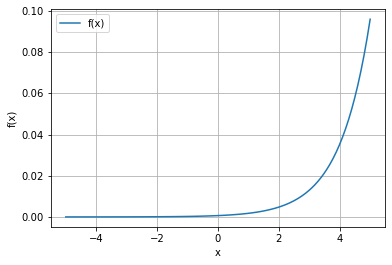

In [12]:
# here we will only plot the function for simplicity. The derivate is more difficult to plot (see, e.g., lecture slides)
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

plt.plot(range_for_demo, softmax(range_for_demo), label="f(x)")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [13]:
Z_output = np.dot(W_1, H) + B_1  # sum of next layer of weights*respective node then add bias
Z_output 

array([[4.59748306]])

In [14]:
y_hat = sigmoid(Z_output)  # Apply activation for output layer's output
y_hat

array([[0.99002337]])

## Loss Functions for Classification

### Cross-Entropy
Entropy $H(y)$ is a term from Information Theory which had great impact on the field of communication. It signifies the optimal number of bits to encode a certain information content. $y_c$ is the probability of the nth event, or in our case, class:

$$H(y) = \sum_c y_c \cdot \log \frac{1}{y_c} = -\sum_c y_c \cdot \log y_c$$

Now the cross-entropy $H(y,\hat{y})$ is the number of bits we'll need if we encode symbols from $y$ using the wrong tool $\hat{y}$. Cross-entropy is always bigger or equal to entropy. Mind that $c$ stands for the number of classes. 

$$H(y, \hat{y}) = \sum_c y_c \cdot \log \frac{1}{\hat{y}_c} = -\sum_c y_c \cdot \log \hat{y}_c$$

Interestingly enough, the The KL divergence, which you might know from other courses is simply the difference between cross-entropy and entropy:
$$\mbox{KL}(y~||~\hat{y})
= \sum_c y_c \log \frac{1}{\hat{y}_c} - \sum_c y_c \log \frac{1}{y_c}
= \sum_c y_c \log \frac{y_c}{\hat{y}_c}$$

We would be calculating the cross-entropy for every pair of true/estimated probabilities and averaging it over the sample or batch - this will be our loss function *L* that we will ultimately want to minimise (class i, sample j):

$$L=-\frac{1}{n}\sum_i \sum_c y_{i,c} \log(\hat{y}_{i,c})$$

### Binary cross-entropy
For **binary classification**, we would use the special case of the equation above with 2 classes called binary cross-entropy (note there are other options like hinge loss).

$$L=-\frac{1}{n}\sum_i \big( y_{i,1}  \log(\hat{y}_{i,1}) + y_{i,2} \log(\hat{y}_{i,2}) \big) $$

#### Deriving the loss function
Now, we need to minimize the loss function. Let's derive the binary cross entropy function for a single observation. We will remove the $\frac{1}{n}$ since it can be divided out in the minimization:

$$\begin{aligned}
& = \frac{\partial L_i}{\partial w} \\
& = - \frac{\partial}{\partial w} y_{1}  \log(\hat{y}_{1}) + \frac{\partial}{\partial w}  y_{2} \log(\hat{y}_{2}) \\
\end{aligned}$$

At this point it is important to remember that the true value is just a constant. The estimate is a function determined by the sigmoid. So, we treat $y$ as a constant, and use the chain rule on $log(\hat y_i)$. We also can replace $y_2$ with $1-y$ and $y_1$ with $y$ since we only have two probabilities/possibilities which are complements of each other. 

$$\begin{aligned}
& = - \frac{y_{1}}{\hat{y}_{1}} \cdot \frac{\partial}{\partial w}\hat{y}_{1} - \frac{y_{2}}{\hat{y}_{2}} \cdot \frac{\partial}{\partial w}\hat{y}_{2} \\
& = - \frac{y}{\hat{y}} \cdot \frac{\partial}{\partial w}\hat{y} - \frac{1-{y}}{1-\hat{y}} \cdot \frac{\partial}{\partial w} (1-\hat{y}) \\
& = - \frac{y}{\hat{y}} \cdot \frac{\partial}{\partial w}\hat{y} + \frac{1-{y}}{1-\hat{y}} \cdot \frac{\partial}{\partial w} \hat{y} \\
\end{aligned}$$


We know that the final equation which determines $\hat y$ is the final sigmoid activation. So, we can replace $\hat y$ with the sigmoid and derive it where necessary (full derivation in part 1 of these tutorials).


$$\begin{aligned}
& = - \frac{y}{\text{sigmoid}} \cdot \frac{\partial}{\partial w} \text{sigmoid} + \frac{1-{y}}{1-\text{sigmoid}} \cdot \frac{\partial}{\partial w} \text{sigmoid}  \\
& = - \frac{y}{\text{sigmoid}} \cdot \text{sigmoid}\cdot (1-\text{sigmoid}) + \frac{1-{y}}{1-\text{sigmoid}} \cdot (\text{sigmoid}\cdot (1-\text{sigmoid}))  \\
& = - y \cdot (1-\text{sigmoid}) + (1-y) \cdot \text{sigmoid} \\
& = - y + y \cdot \text{sigmoid} + \text{sigmoid}-y \cdot \text{sigmoid} \\
& = \text{sigmoid}-{y} \\
\end{aligned}$$

The sigmoid at the end is also the prediction, so that means: $$ \text{sigmoid}-{y} = \hat{y}-{y} $$ The extreme simplicity of this function's derivative is what makes it so ideal for a loss function, especially when the number of calculations starts to grow in the optimization process.

In [15]:
# Define the binary cros entropy loss function
def bce(true, pred):
    eps = 1e-50 # small epsilon so that the log never tries to div by 0
    return - np.mean(
        np.multiply(true, np.log(pred + eps)) + np.multiply((1-true), np.log(1 - pred + eps)))

def bce_derivative(pred, true):
    return pred - true

Let's take a look at the intial loss for observation 5, the derivative of the loss function and final activation function.

In [16]:
loss = bce(Y[5], y_hat)
loss

0.01002673136404279

In [17]:
loss_derivative = bce_derivative(y_hat, Y[5])
loss_derivative

array([[-0.00997663]])

In [18]:
final_activation_derivative = sigmoid_derivative(Z_output)
final_activation_derivative

array([[0.0098771]])

## Optimization based on loss
Note that the steps to calculate loss below have now been replaced with the derivative of binary cross entropy.

In [19]:
# Update weights furthest back in the network (between hidden and output layer)
gradient_HiddenToOutput = np.dot(loss_derivative*final_activation_derivative, np.transpose(H))
gradient_HiddenToOutput.shape

# Update output layer biases
gradient_HiddenToOutput_bias = loss_derivative*final_activation_derivative

# Save the error of the output layer
pred_errors = loss_derivative * final_activation_derivative

# Find gradient for next step for backpropagation: gradient to update weights between hidden and input layer
gradient_InputToHidden = np.dot(W_1.T, pred_errors)
print(f'Shape of first weights {W_1.shape}')

# Next propagation backwards: derivative of the hidden layer output wrt the hidden layer input (tanh derivative)
gradient_InputToHidden = gradient_InputToHidden * tanH_derivative(Z_hidden)
print(f'Shape of gradient vector {gradient_InputToHidden.shape}')

# Derivate of the hidden layer input wrt to the weight matrix connecting the hidden layer to inputs X
gradient_InputToHidden = np.dot(gradient_InputToHidden, np.transpose(X))
print(f'Shape of input {X.shape}')

# Last update: output layer biases
gradient_InputToHidden_bias = np.dot(W_1.T, pred_errors) * tanH_derivative(Z_hidden)

Shape of first weights (1, 10)
Shape of gradient vector (10, 1)
Shape of input (2, 1)


## Initial weight correction
There are no big differences for the rest of the neural network, we are just going to replace the elements that were specifically for a regression network before.

In [20]:
# Gradient descent step
learningRate = 0.0001  # define some learning rate

# Update weights between hidden and output layer (furthest back)
W_1 -= learningRate * gradient_HiddenToOutput
# Update bias in output layer
B_1 -= learningRate * gradient_HiddenToOutput_bias
# Update weights between input and hidden layer (furthest forward)
W_0 -= learningRate * gradient_InputToHidden
# Update bias in hidden layer
B_0 -= learningRate * gradient_InputToHidden_bias

## Setting learning rate, epochs and batch sizes
As before, we will need to set a few more parameters which parameters which we can later adjust for better optimization of the network:
- Learning rate: how much the algorithm will move in the negative direction of the gradient, too large and we will likely overshoot a local minimum, too low and no improvement will be seen
- Epochs: how many rounds to train the model, too few could be too little for improvement, too many could cause the capture of too much noise in the data
- Batch size: the amount of observations that we will be randomly selecting for the optimization of our network, especially important when there are many nodes, features and individual observations

In [21]:
learningRate = 0.0001
epochs =  85  # stopping rule, how many corrective iterations we will allow
batch_size = 250

input_dim = XX.shape[1]  # number of variables
output_dim = 1  # should be equal to 1 since we are only finding the predicted value for 1 regression

## Rewire SGD for binary classification
In the same code that we used before, we just have to replace the final activation with a sigmoid function and the loss function to binary cross-entropy. The derivative for these two activations will also be necessary. 

In [22]:
iteration = 0

loss_log = []

while iteration < epochs:

    # Process one batch of random observations per epoch/iteration
    random_batch = random.sample(range(0, XX.shape[0]), batch_size)  # choose observations for random batch

    # Update weights and biases one at a time with each random observation's error (all steps before, just in a loop together)
    for obs in random_batch:

        # Select feature values and target value for random observation
        X = np.array(XX[obs]).reshape((input_dim, 1))
        y = Y[obs].reshape((1, 1))

        # Compute the forward pass through the network all the way up to the final output
        Z_hidden = np.dot(W_0, X) + B_0
        H = tanH(Z_hidden)
        Z_output = np.dot(W_1, H) + B_1
        y_hat = sigmoid(Z_output)  # final activation is sigmoid instead of ReLU

        # Gradient for the weights between hidden and output layers
        gradient_HiddenToOutput = bce_derivative(Y[obs], y_hat) * sigmoid_derivative(y_hat) # use derivative of BCE loss and sigmoid
        pred_errors = gradient_HiddenToOutput

        # Gradient for the weights between input and hidden layers
        gradient_InputToHidden = np.dot(W_1.T, pred_errors) * tanH_derivative(Z_hidden)

        # Update biases according to learning rate and gradient
        B_1 -= learningRate * gradient_HiddenToOutput
        B_0 -= learningRate * gradient_InputToHidden

        # Update weights according to learning rate and gradient
        W_1 -= learningRate * np.dot(gradient_HiddenToOutput, np.transpose(Z_hidden))
        W_0 -= learningRate * np.dot(gradient_InputToHidden, np.transpose(X))

    # Check how well the model does on all observations by passing them through a forward pass with most up to date weights
    XX_reshaped = np.array(XX).reshape((inputLayer_size, n))  # all observations
    Y_reshaped = Y.reshape((outputLayer_size, n))
    Z_hidden = np.dot(W_0, XX_reshaped) + B_0  # first hidden layer inputs
    H = tanH(Z_hidden)  # hidden layer output (after activation)
    Z_output = np.dot(W_1, H) + B_1  # input to output layer
    Y_hat = sigmoid(Z_output) # Sigmoid output instead of ReLU
    
    # Calculate loss for entire model
    iteration_loss = bce(Y_reshaped, Y_hat) # Here are we are using BCE
    loss_log.append(iteration_loss)

    # Development of the loss as average over observation-level losses
    print(f'Epoch {iteration+1} with average error of {iteration_loss:.2f}.')
    iteration += 1

Epoch 1 with average error of 1.48.
Epoch 2 with average error of 1.48.
Epoch 3 with average error of 1.48.
Epoch 4 with average error of 1.47.
Epoch 5 with average error of 1.47.
Epoch 6 with average error of 1.46.
Epoch 7 with average error of 1.46.
Epoch 8 with average error of 1.46.
Epoch 9 with average error of 1.45.
Epoch 10 with average error of 1.45.
Epoch 11 with average error of 1.44.
Epoch 12 with average error of 1.44.
Epoch 13 with average error of 1.43.
Epoch 14 with average error of 1.43.
Epoch 15 with average error of 1.43.
Epoch 16 with average error of 1.42.
Epoch 17 with average error of 1.42.
Epoch 18 with average error of 1.41.
Epoch 19 with average error of 1.41.
Epoch 20 with average error of 1.40.
Epoch 21 with average error of 1.40.
Epoch 22 with average error of 1.39.
Epoch 23 with average error of 1.39.
Epoch 24 with average error of 1.38.
Epoch 25 with average error of 1.38.
Epoch 26 with average error of 1.37.
Epoch 27 with average error of 1.37.
Epoch 28 w

In just under 100 rounds, the machine was able to almost half the error size! That is a pretty good amount of progress for a simple network that we created.

# Multi-class problems

## Output layer size for multiclass problems
Your output layer will have one node per class for **multi-class problems**.

## Final activation for multiclass problems

If you have **single label multi-class problem** and each observation can only be 1 class (eg. classifying pictures of fish, dogs and cats), you will also want to make sure that the probability of all classes sums to 1. This is when you will want to use the **softmax** function as the final activation.

If you have a **multiple label multi-class problem**, simultaneous labels are possible (eg. which products will a consumer buy). This means they no longer need to sum to 1. In this case, a **sigmoid** is fine as a final activation. 

## Loss functions for multiclass problems
For **single label multi-class problems**, you should use categorical cross-entropy or the generalized version of the equation for $ L $ above.

For **multi-label multi-class problems**, you can use binary cross-entropy again because any label has its own probability.

# Cheat sheet for each scenario:

For **regression problems**:
- Make sure your output is 1 variable with any range
- Output layer should be size 1
- Output could be any number
- Final activation function: linear or ReLU
- Most popular loss function: MSE or MAE

For **binary classification problem with target coded as a single dummy vector**:
- Make sure your output is a single binary variable with values 0 and 1
- Output layer should be size 1
- Output will range from 0 to 1 and represent the probability of being class 1
- Final activation function: sigmoid
- Loss function: binary cross entropy

For **binary classification problem with target coded as two complementary dummy:
- Make sure your output is two binary variables representing probabilities of class 0 and class 1
- Output layer should be size 2
- Output nodes will range from 0 to 1 and represent the probability of being class 0 and 1 respectively
- Final activation function: softmax
- Loss function: binary cross entropy

For **multiple possible classes but strictly 1 class per observation (single label)**:
- Make sure your output size is equivalent to the number of classes
- Each value for outputs must be between 0 and 1
- Output layer should be equivalent to the number of classes
- Output will range for each class from 0 to 1 and represent the probability of being that class
- Final activation: softmax
- Loss function: categorical cross entropy

For **multiple possible classes and multiple classes per observation are possible (multiple labels)**:
- Make sure your output size is equivalent to the number of classes
- Each value for outputs must be between 0 and 1
- Output layer should be equivalent to the number of classes
- Output will range for each class from 0 to 1 and represent the probability of being that class
- Final activation: sigmoid
- Loss function: binary cross entropy